In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

from keras.models import Sequential
from keras.layers import Dense,Conv2D,LSTM,LeakyReLU,MaxPooling2D,Flatten,TimeDistributed,Activation,Dropout
from keras.optimizers import Adam
from keras.losses import binary_crossentropy,categorical_crossentropy
from keras.activations import softmax

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
 

In [2]:
df=pd.read_csv("set_main.csv")
df

,Unnamed: 0,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,duration,orig_bytes,resp_bytes,...,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR
0,0,1.525880e+09,CDe43c1PtgynajGI6,192.168.100.103,60905.0,131.174.215.147,23.0,2.998796,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,1.525880e+09,CJaDcG3MZzvf1YVYI4,192.168.100.103,44301.0,91.42.47.63,23.0,0.000000,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2,1.525880e+09,CMBrup3BLXivSp4Avc,192.168.100.103,50244.0,120.210.108.200,23.0,0.000000,0,0,...,0,0,0,1,0,0,0,0,0,0
3,3,1.525880e+09,CfHl9r3XMYtDQRrHnh,192.168.100.103,34243.0,147.7.65.203,49560.0,2.998804,0,0,...,0,0,0,1,0,0,0,0,0,0
4,4,1.525880e+09,C7USrA15nFVkniMqC5,192.168.100.103,34840.0,145.164.35.6,21288.0,0.000000,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446616,122,1.562165e+09,CbiAr234EfpzQInxbg,0.0.0.0,68.0,255.255.255.255,67.0,-1.000000,-1,-1,...,0,0,0,1,0,0,0,0,0,0
1446617,123,1.562165e+09,CqEhZf1lYmVokqECn3,::,143.0,ff02::16,0.0,-1.000000,-1,-1,...,0,0,0,0,0,0,0,0,0,0
1446618,124,1.562165e+09,Cr5vKO1CGfMQwFp22c,::,135.0,ff02::1:ffd5:cdf,136.0,-1.000000,-1,-1,...,0,0,0,0,0,0,0,0,0,0
1446619,125,1.562165e+09,CQ5cJ21U9NUbUWIznd,fe80::5bcc:698e:39d5:cdf,143.0,ff02::16,0.0,-1.000000,-1,-1,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df=df.drop(columns=["Unnamed: 0"])
df

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,duration,orig_bytes,resp_bytes,missed_bytes,...,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR
0,1.525880e+09,CDe43c1PtgynajGI6,192.168.100.103,60905.0,131.174.215.147,23.0,2.998796,0,0,0.0,...,0,0,0,1,0,0,0,0,0,0
1,1.525880e+09,CJaDcG3MZzvf1YVYI4,192.168.100.103,44301.0,91.42.47.63,23.0,0.000000,0,0,0.0,...,0,0,0,1,0,0,0,0,0,0
2,1.525880e+09,CMBrup3BLXivSp4Avc,192.168.100.103,50244.0,120.210.108.200,23.0,0.000000,0,0,0.0,...,0,0,0,1,0,0,0,0,0,0
3,1.525880e+09,CfHl9r3XMYtDQRrHnh,192.168.100.103,34243.0,147.7.65.203,49560.0,2.998804,0,0,0.0,...,0,0,0,1,0,0,0,0,0,0
4,1.525880e+09,C7USrA15nFVkniMqC5,192.168.100.103,34840.0,145.164.35.6,21288.0,0.000000,0,0,0.0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446616,1.562165e+09,CbiAr234EfpzQInxbg,0.0.0.0,68.0,255.255.255.255,67.0,-1.000000,-1,-1,0.0,...,0,0,0,1,0,0,0,0,0,0
1446617,1.562165e+09,CqEhZf1lYmVokqECn3,::,143.0,ff02::16,0.0,-1.000000,-1,-1,0.0,...,0,0,0,0,0,0,0,0,0,0
1446618,1.562165e+09,Cr5vKO1CGfMQwFp22c,::,135.0,ff02::1:ffd5:cdf,136.0,-1.000000,-1,-1,0.0,...,0,0,0,0,0,0,0,0,0,0
1446619,1.562165e+09,CQ5cJ21U9NUbUWIznd,fe80::5bcc:698e:39d5:cdf,143.0,ff02::16,0.0,-1.000000,-1,-1,0.0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df["label"].value_counts()

X = df[['duration','orig_bytes','resp_bytes','missed_bytes','orig_pkts','orig_ip_bytes','resp_pkts','resp_ip_bytes','proto_icmp','proto_tcp','proto_udp','conn_state_OTH','conn_state_REJ','conn_state_RSTO','conn_state_RSTOS0','conn_state_RSTR','conn_state_RSTRH','conn_state_S0','conn_state_S1','conn_state_S2','conn_state_S3','conn_state_SF','conn_state_SH','conn_state_SHR']].values

In [5]:
X=np.pad(X, [(0, 0), (6, 6)], mode='constant', constant_values=0)
X.shape,X



((1446621, 36),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

In [6]:

X=MinMaxScaler().fit_transform(X)
X

# y=pd.get_dummies(df['label']).values

# y,y.shape

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [7]:
X=np.reshape(X,(X.shape[0],6,6))
X.shape,X

((1446621, 6, 6),
 array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
          0.00000000e+00, 0.00000000e+00],
         [5.07195406e-05, 5.73121586e-10, 2.97162380e-09, 0.00000000e+00,
          4.54357144e-08, 9.40049264e-08],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
          0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
          0.00000000e+00, 1.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
          0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
          0.00000000e+00, 0.00000000e+00]],
 
        [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
          0.00000000e+00, 0.00000000e+00],
         [1.26837029e-05, 5.73121586e-10, 2.97162380e-09, 0.00000000e+00,
          1.51452381e-08, 3.13349755e-08],
         [0.00000000e+00, 0.00000000e+00, 0

In [8]:
# y_norm=MinMaxScaler().fit_transform(y)
# #y_norm=np.reshape(y_norm,(999,2,-1))
lab_pd=df[['label']]
# y_norm,y_norm.shape
lab=lab_pd.values
# y=pd.get_dummies(df[['label']],dtype='uint8').values
# y=MinMaxScaler().fit_transform(y)
# y,y.shape#,len(df[['label']].value_counts())
y=[]
lab,lab.shape

for l in lab:
    if l[0]!='Benign':
        y.append(1)
    else: y.append(0)
y=np.array(y)
y=np.reshape(y,(1446621,1))
lab_pd.value_counts(),lab.shape,y,y.shape



(label                    
 PartOfAHorizontalPortScan    825939
 Okiru                        262690
 Benign                       199756
 DDoS                         138777
 C&C                           15100
 Attack                         3915
 HeartBeat                       349
 C&C-FileDownload                 43
 C&C-Torii                        30
 FileDownload                     21
 C&C-Mirai                         1
 Name: count, dtype: int64,
 (1446621, 1),
 array([[1],
        [1],
        [1],
        ...,
        [0],
        [0],
        [0]]),
 (1446621, 1))

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=5)


# X_train=np.expand_dims(np.expand_dims(X_train,axis=-1),axis=0)
# y_train=np.expand_dims(y_train,axis=0)
#y_train = np.argmax(y_train, axis=1)
#X_train=X_train.astype('float32')/255
#X_test=X_test.astype('float32')/255
X_train.shape,y_train.shape

((867972, 6, 6), (867972, 1))

In [10]:
#nn=tf.keras.models.Sequential()
nn=Sequential()

nn.add(Conv2D(80,kernel_size=2,strides=1,padding='same',input_shape=(6,6,1)))
nn.add(LeakyReLU(0.01))
# nn.add(Dropout(0.2))
nn.add(Conv2D(40,kernel_size=2,strides=1,padding='same'))
#nn.add(LeakyReLU(0.01))
# nn.add(Dropout(0.2))
nn.add(Conv2D(20,kernel_size=3,strides=1))
nn.add(LeakyReLU(0.01))
nn.add(Dropout(0.2))
nn.add(Conv2D(30,kernel_size=2,strides=1))
#nn.add(LeakyReLU(0.01))
nn.add(Dropout(0.2))



nn.add(Dense(100))
nn.add(Dropout(0.2))
nn.add(Dense(11))

nn.add(tf.keras.layers.Reshape((9,11)))
nn.add(LSTM(4,activation='tanh',recurrent_activation='sigmoid'))
nn.add(Dense(1,activation='sigmoid'))



nn.summary()
nn.compile(optimizer=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-8),loss=binary_crossentropy,metrics=['accuracy'])
# nn.add(MaxPooling2D())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 6, 6, 80)          400       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 6, 6, 80)          0         
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 40)          12840     
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 20)          7220      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 4, 4, 20)          0         
                                                                 
 dropout (Dropout)           (None, 4, 4, 20)          0         
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 3, 30)          2

In [11]:
history=nn.fit(X_train,y_train,epochs=2,batch_size=1000,validation_data=(X_test,y_test))

# nn.add(tf.keras.layers.Dense(2000,input_dim=24))
# nn.add(tf.keras.layers.LeakyReLU(0.01))
# nn.add(tf.keras.layers.Dense(1500, activation='relu'))
# nn.add(tf.keras.layers.Dropout(0.2))
# nn.add(tf.keras.layers.Dense(800,activation='relu'))
# nn.add(tf.keras.layers.Dropout(0.2))
# nn.add(tf.keras.layers.Dense(400,activation='relu'))
# nn.add(tf.keras.layers.Dropout(0.2))
# nn.add(tf.keras.layers.Dense(150,activation='relu'))
# nn.add(tf.keras.layers.Dropout(0.2))
# nn.add(tf.keras.layers.Dense(13, activation='softmax'))
# nn.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# #nn.add(tf.keras.layers.Input((6,6,1)))

# #Convolutional neural network
# #nn.add(tf.keras.layers.Dense(80)))
# nn.add(tf.keras.layers.Conv2D(80,2,strides=1,data_format='channels_last',kernel_initializer=glorot_uniform(seed=0)))
# nn.add(tf.keras.layers.LeakyReLU(alpha=0.01))
# #nn.add(tf.keras.layers.MaxPooling2D())


# nn.add(tf.keras.layers.Conv2D(40,2,strides=1,kernel_initializer=glorot_uniform(seed=0)))
# #nn.add(tf.keras.layers.LeakyReLU(alpha=0.01))
# #nn.add(tf.keras.layers.MaxPooling2D())

# nn.add(tf.keras.layers.Conv2D(20,3,strides=1,kernel_initializer=glorot_uniform(seed=0)))
# #nn.add(tf.keras.layers.LeakyReLU(alpha=0.01))
# #nn.add(tf.keras.layers.MaxPooling2D())

# nn.add(tf.keras.layers.Conv2D(30,2,strides=1,kernel_initializer=glorot_uniform(seed=0)))
# #nn.add(tf.keras.layers.LeakyReLU(alpha=0.01))
# #nn.add(tf.keras.layers.MaxPooling2D())
# nn.add(tf.keras.layers.Flatten())
# #nn.add(tf.keras.layers.Reshape(target_shape=(X_train.shape[0],X_train.shape[1],-1)))



# #nn.summary()
# #LSTM network
# #nn.add(tf.keras.layers.LSTM(3,activation='tanh',recurrent_activation="sigmoid"))
# nn.add(tf.keras.layers.Dense(100,activation='softmax',kernel_initializer=glorot_uniform(seed=0)))

# nn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),loss=tf.keras.losses.categorical_crossentropy,metrics=['accuracy'])


Epoch 1/2
868/868 [==============================] - 46s 50ms/step - loss: 0.3392 - accuracy: 0.8945 - val_loss: 0.3194 - val_accuracy: 0.9027
Epoch 2/2
868/868 [==============================] - 44s 50ms/step - loss: 0.3163 - accuracy: 0.9024 - val_loss: 0.3127 - val_accuracy: 0.9027


In [309]:



# nn.summary()

Model: "sequential_52"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_131 (Dense)           (None, 2000)              50000     
                                                                 
 leaky_re_lu_69 (LeakyReLU)  (None, 2000)              0         
                                                                 
 dense_132 (Dense)           (None, 1500)              3001500   
                                                                 
 dropout_32 (Dropout)        (None, 1500)              0         
                                                                 
 dense_133 (Dense)           (None, 800)               1200800   
                                                                 
 dropout_33 (Dropout)        (None, 800)               0         
                                                                 
 dense_134 (Dense)           (None, 400)             

In [313]:
# model=nn.fit(X_train,y_train,batch_size=648,epochs=2,validation_data=(X_test,y_test),verbose=1)

Epoch 1/2
1784/1784 [==============================] - 36s 20ms/step - loss: 0.6841 - accuracy: 0.6736 - val_loss: 0.6588 - val_accuracy: 0.6836
Epoch 2/2
1784/1784 [==============================] - 36s 20ms/step - loss: 0.6657 - accuracy: 0.6783 - val_loss: 0.6578 - val_accuracy: 0.6837


In [314]:
# loss_metrics = nn.evaluate(X_test, y_test, verbose=2)
# print("Test Loss", loss_metrics[0])
# print("Test Accuracy", loss_metrics[1])

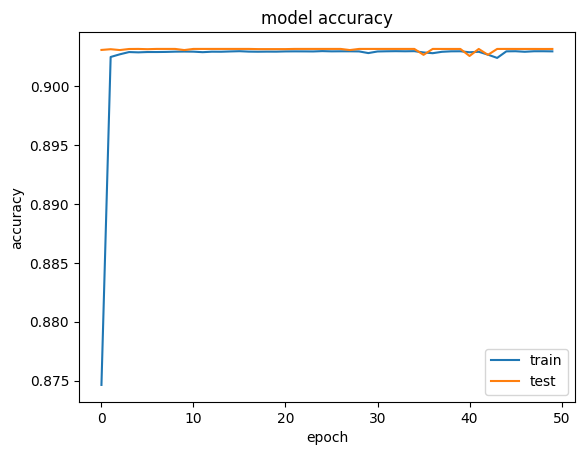

In [116]:
plt.subplot(1,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

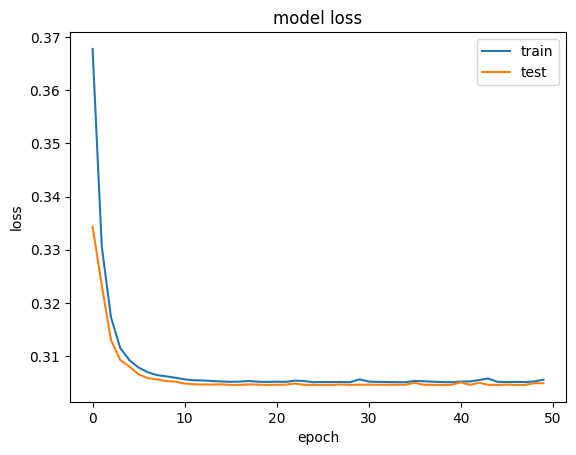

In [118]:
plt.subplot(1,1,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')